In [1]:
import cv2 as cv
import os
import paddle


class GOALS2022Dataset(paddle.io.Dataset):
    def __init__(self, mode):
        self.mode = mode
        if mode == "Train":
            self.lbound = 1
            self.rbound = 100
        elif mode == "Validation":
            self.lbound = 101
            self.rbound = 200

    def __getitem__(self, i):
        if os.path.exists(
            f"data/data175394/GOALS2022/{self.mode}/GC_Label_0/{i + self.lbound:0>4}.png"
        ):
            img = cv.imread(
                f"data/data175394/GOALS2022/{self.mode}/GC_Label_0/{i + self.lbound:0>4}.png"
            )
            img = cv.resize(img, (224, 224))
            # H, W, C => C, H, W
            img = img.transpose((2, 0, 1))
            # numpy => paddle
            img = paddle.to_tensor(img)
            # [0, 255] => [0, 1]
            img = img / 255
            return img, 0
        elif os.path.exists(
            f"data/data175394/GOALS2022/{self.mode}/GC_Label_1/{i + self.lbound:0>4}.png"
        ):
            img = cv.imread(
                f"data/data175394/GOALS2022/{self.mode}/GC_Label_1/{i + self.lbound:0>4}.png"
            )
            img = cv.resize(img, (224, 224))
            # H, W, C => C, H, W
            img = img.transpose((2, 0, 1))
            # numpy => paddle
            img = paddle.to_tensor(img)
            # [0, 255] => [0, 1]
            img = img / 255
            return img, 1
        else:
            raise FileNotFoundError

    def __len__(self):
        return self.rbound - self.lbound + 1


train_data = GOALS2022Dataset("Train")
eval_data = GOALS2022Dataset("Validation")
model = paddle.Model(paddle.vision.models.vgg11(num_classes=2))
'''
model.prepare(
    optimizer=paddle.optimizer.Adam(learning_rate=0.001, parameters=model.parameters()),
    loss=paddle.nn.CrossEntropyLoss(),
    metrics=paddle.metric.Accuracy(),
)
model.fit(train_data, batch_size=32, epochs=100, verbose=1)
model.evaluate(eval_data)
'''
model.load('vgg11')
#model.summary()

W1110 17:11:25.694427 15143 gpu_resources.cc:61] Please NOTE: device: 0, GPU Compute Capability: 7.0, Driver API Version: 11.2, Runtime API Version: 11.2
W1110 17:11:25.698065 15143 gpu_resources.cc:91] device: 0, cuDNN Version: 8.2.


/opt/conda/envs/python35-paddle120-env/lib/python3.7/site-packages/matplotlib/__init__.py:107: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated, and in 3.8 it will stop working
  from collections import MutableMapping
/opt/conda/envs/python35-paddle120-env/lib/python3.7/site-packages/matplotlib/rcsetup.py:20: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated, and in 3.8 it will stop working
  from collections import Iterable, Mapping
/opt/conda/envs/python35-paddle120-env/lib/python3.7/site-packages/matplotlib/colors.py:53: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated, and in 3.8 it will stop working
  from collections import Sized
/opt/conda/envs/python35-paddle120-env/lib/python3.7/site-packages/interpretdl/interpreter/abc_interpreter.py:294: UserWarning: ``use_cuda`` would be deprecate

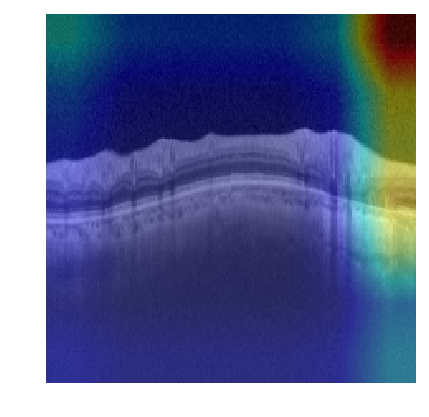

100%|██████████| 512/512 [00:02<00:00, 172.22it/s]


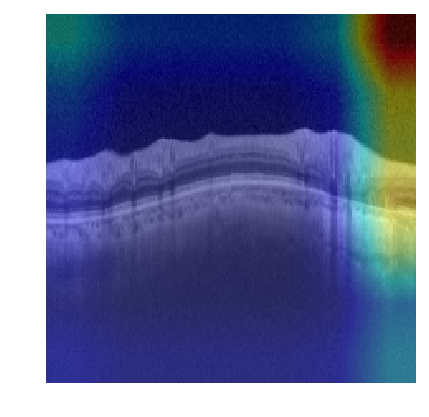

100%|██████████| 512/512 [00:02<00:00, 173.56it/s]


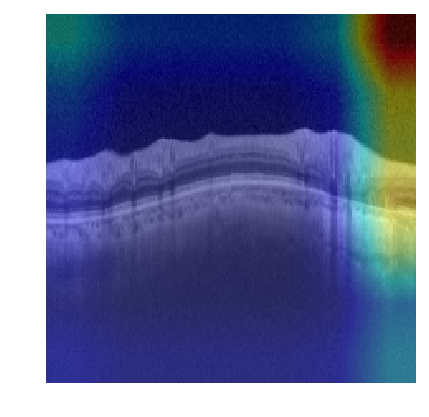

100%|██████████| 512/512 [00:03<00:00, 170.14it/s]


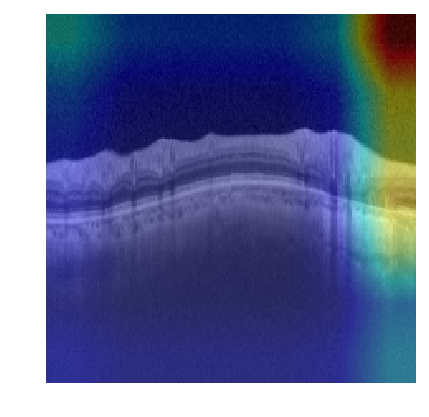

100%|██████████| 512/512 [00:02<00:00, 173.54it/s]


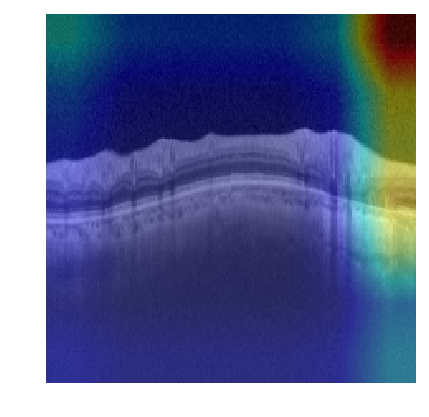

100%|██████████| 512/512 [00:02<00:00, 174.47it/s]


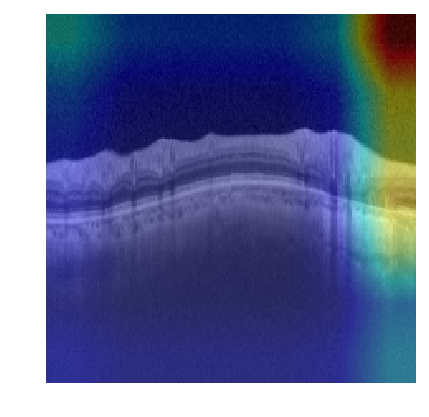

100%|██████████| 512/512 [00:02<00:00, 174.83it/s]


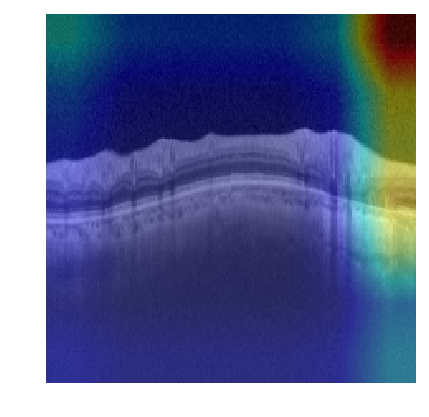

100%|██████████| 512/512 [00:02<00:00, 175.13it/s]


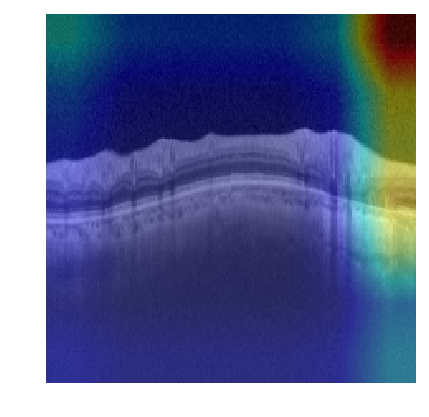

100%|██████████| 512/512 [00:02<00:00, 175.68it/s]


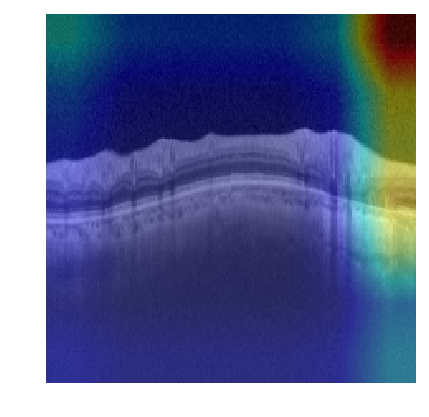

100%|██████████| 512/512 [00:02<00:00, 172.33it/s]


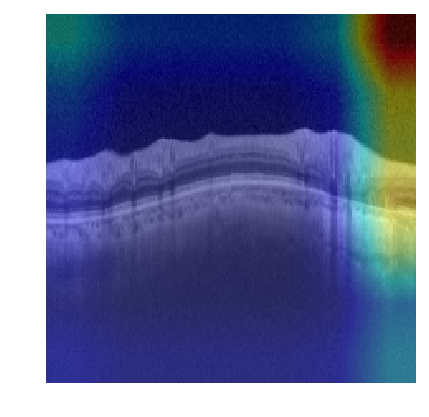

100%|██████████| 512/512 [00:02<00:00, 172.65it/s]


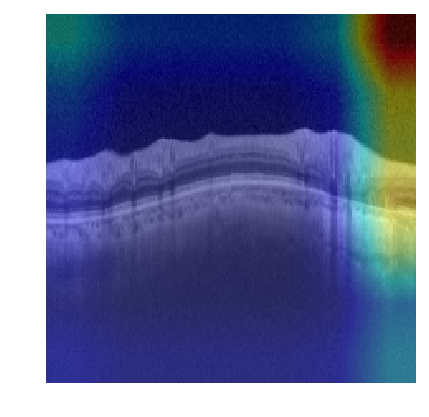

100%|██████████| 512/512 [00:02<00:00, 172.06it/s]


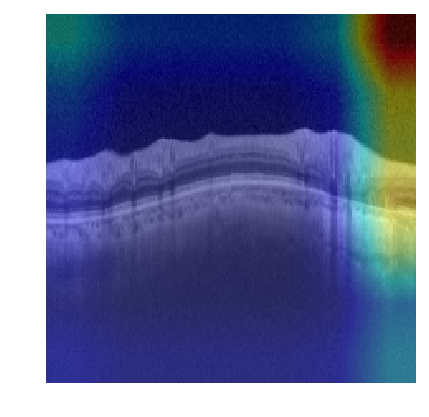

100%|██████████| 512/512 [00:02<00:00, 172.74it/s]


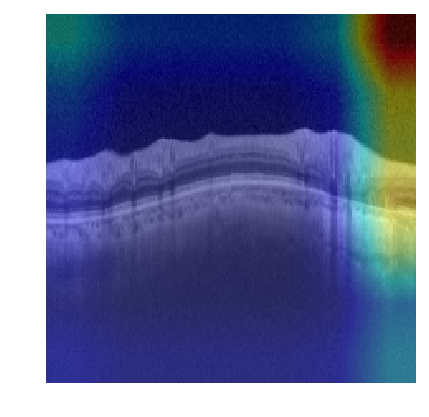

100%|██████████| 512/512 [00:02<00:00, 171.88it/s]


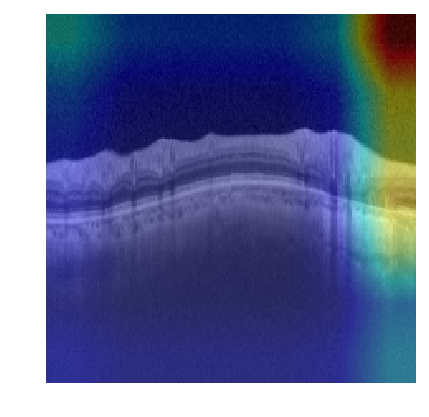

100%|██████████| 512/512 [00:02<00:00, 174.58it/s]


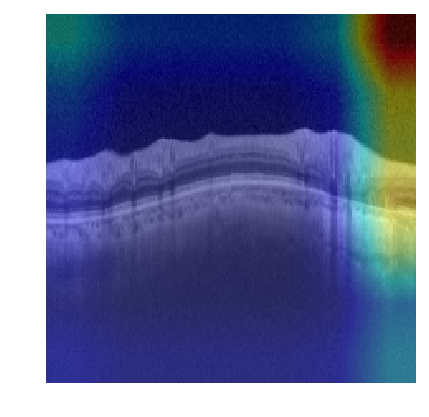

100%|██████████| 512/512 [00:02<00:00, 176.08it/s]


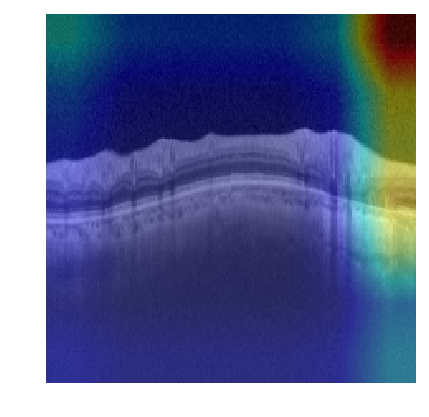

100%|██████████| 512/512 [00:02<00:00, 175.62it/s]


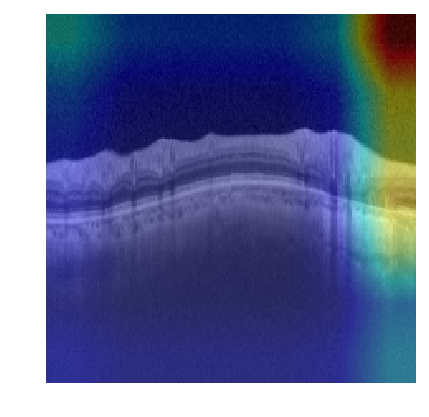

100%|██████████| 512/512 [00:02<00:00, 174.85it/s]


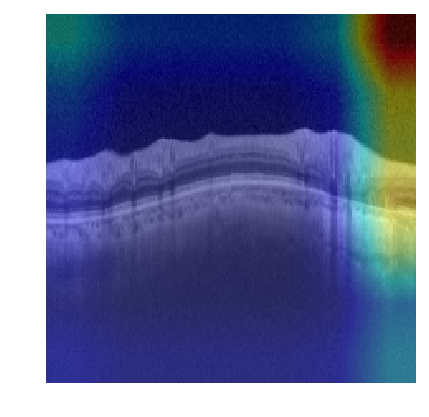

100%|██████████| 512/512 [00:02<00:00, 174.01it/s]


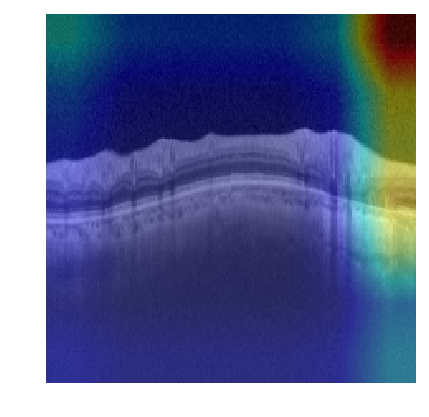

100%|██████████| 512/512 [00:03<00:00, 156.31it/s]


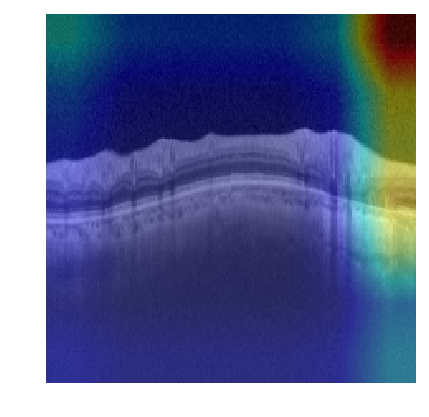

100%|██████████| 512/512 [00:02<00:00, 173.34it/s]


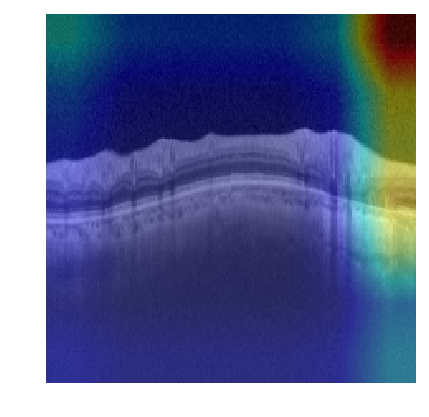

100%|██████████| 512/512 [00:02<00:00, 173.17it/s]


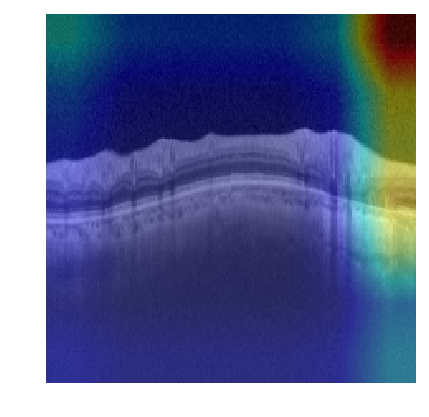

100%|██████████| 512/512 [00:02<00:00, 172.31it/s]


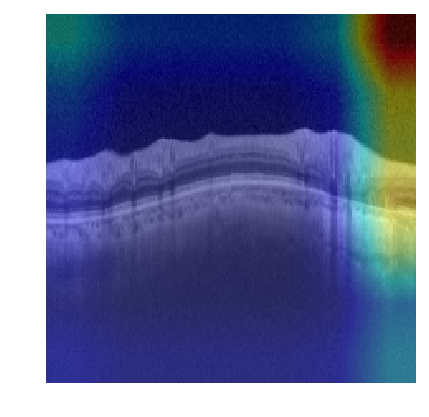

100%|██████████| 512/512 [00:02<00:00, 173.74it/s]


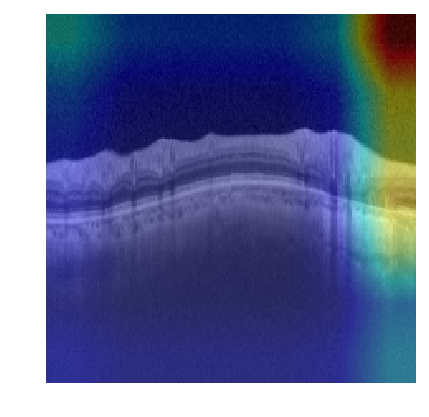

100%|██████████| 512/512 [00:02<00:00, 171.93it/s]


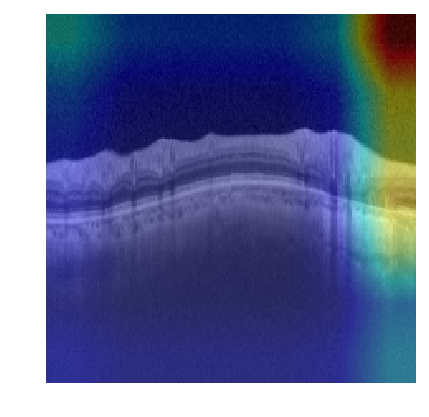

100%|██████████| 512/512 [00:02<00:00, 171.57it/s]


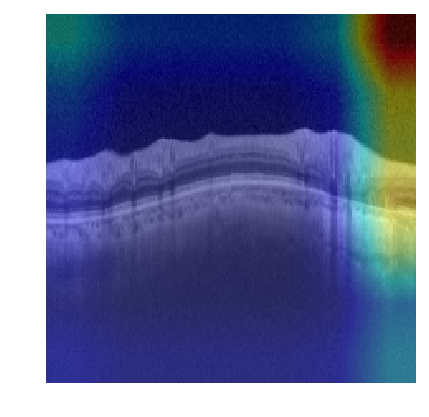

100%|██████████| 512/512 [00:02<00:00, 171.78it/s]


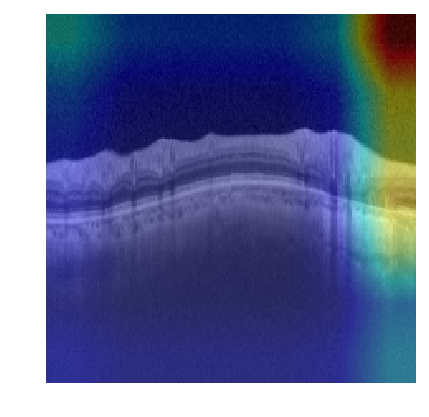

100%|██████████| 512/512 [00:02<00:00, 173.82it/s]


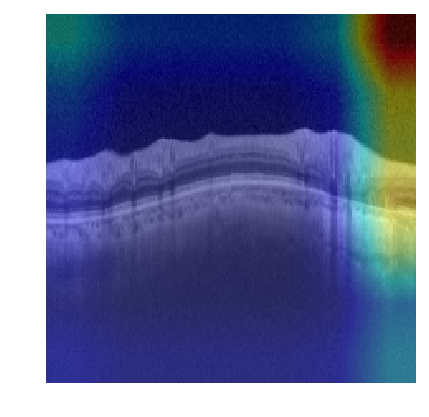

100%|██████████| 512/512 [00:02<00:00, 172.71it/s]


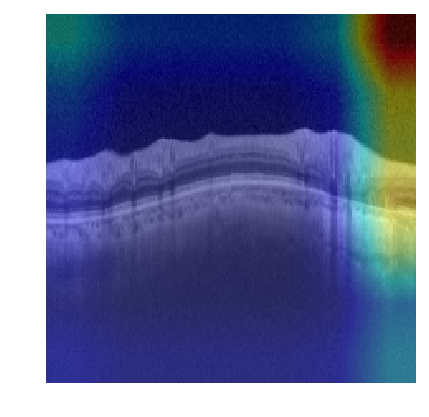

100%|██████████| 512/512 [00:02<00:00, 174.57it/s]


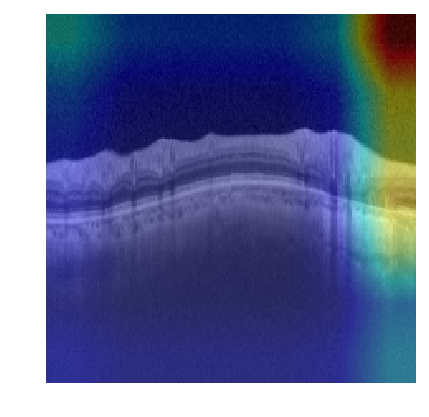

100%|██████████| 512/512 [00:02<00:00, 173.89it/s]


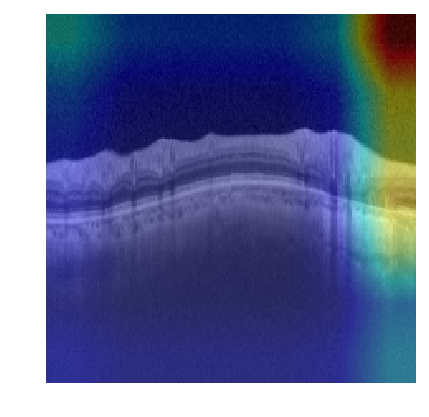

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import interpretdl as it
import cv2 as cv
img = cv.imread('data/data175394/GOALS2022/Validation/GC_Label_0/0107.png')
img = cv.resize(img, (224, 224))
sg = it.ScoreCAMInterpreter(model.network, use_cuda=True)
for n, v in model.network.named_sublayers():
    try:
        sg.interpret(img, target_layer_name=n)
    except:
        print('Except')

100%|██████████| 512/512 [00:02<00:00, 173.00it/s]


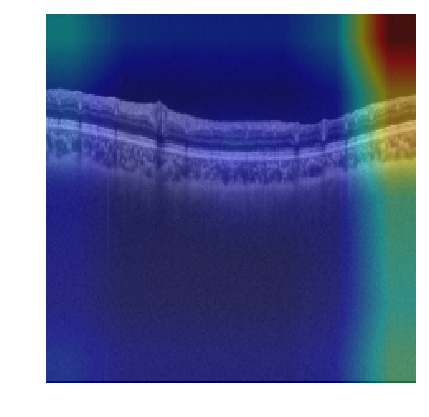

100%|██████████| 512/512 [00:02<00:00, 173.52it/s]


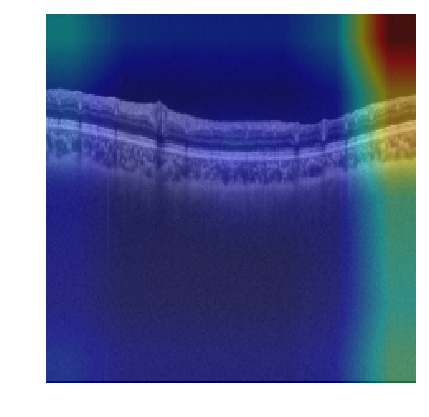

100%|██████████| 512/512 [00:02<00:00, 173.58it/s]


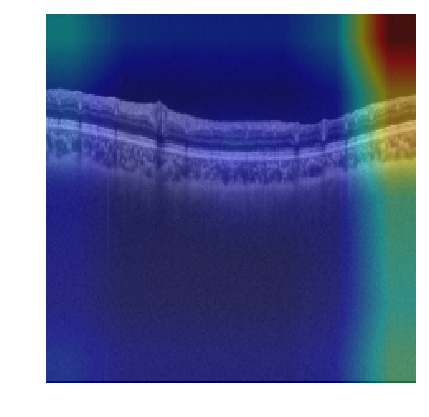

100%|██████████| 512/512 [00:02<00:00, 173.48it/s]


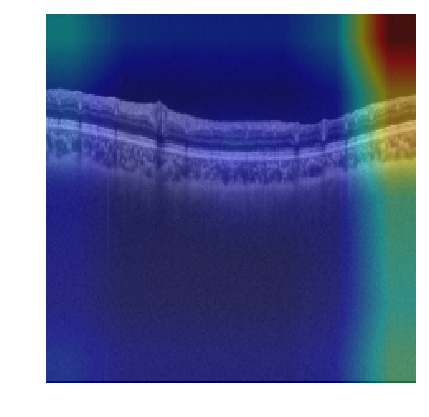

100%|██████████| 512/512 [00:02<00:00, 174.00it/s]


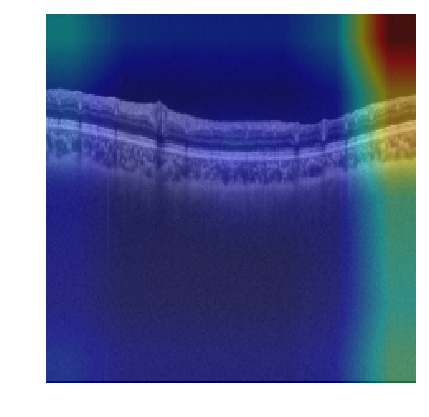

100%|██████████| 512/512 [00:02<00:00, 170.97it/s]


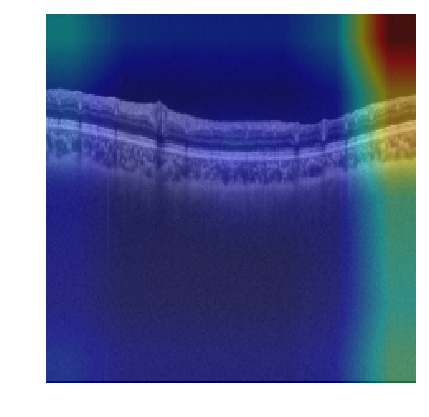

100%|██████████| 512/512 [00:02<00:00, 174.25it/s]


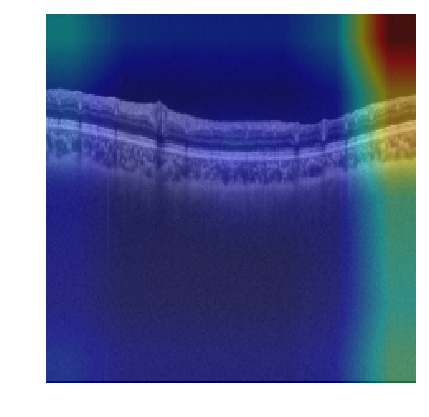

100%|██████████| 512/512 [00:02<00:00, 174.06it/s]


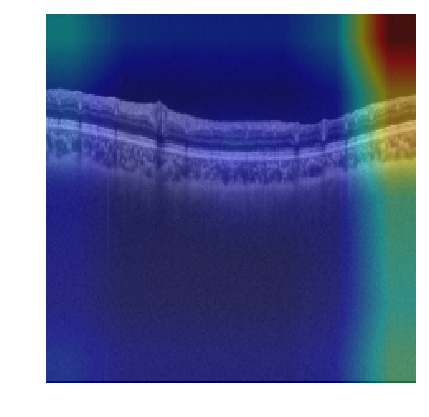

100%|██████████| 512/512 [00:02<00:00, 174.82it/s]


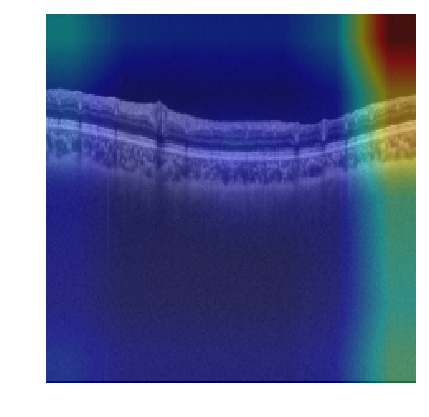

100%|██████████| 512/512 [00:02<00:00, 175.04it/s]


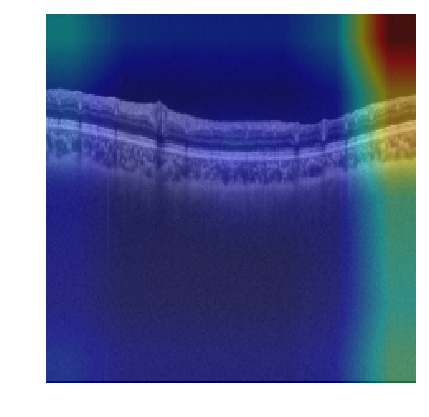

100%|██████████| 512/512 [00:02<00:00, 174.37it/s]


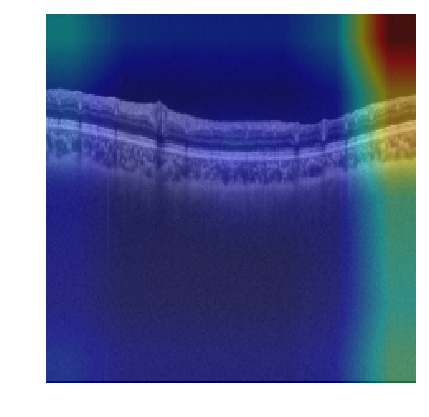

100%|██████████| 512/512 [00:02<00:00, 174.23it/s]


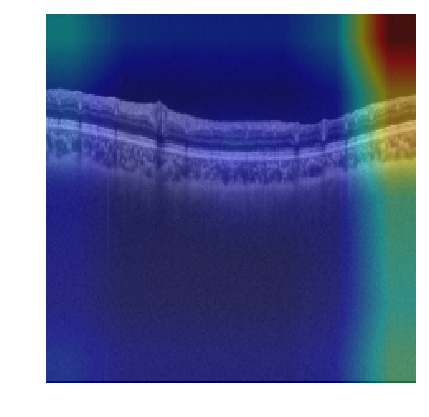

100%|██████████| 512/512 [00:02<00:00, 174.22it/s]


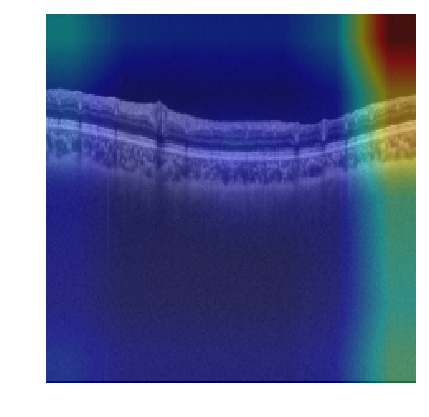

100%|██████████| 512/512 [00:02<00:00, 173.98it/s]


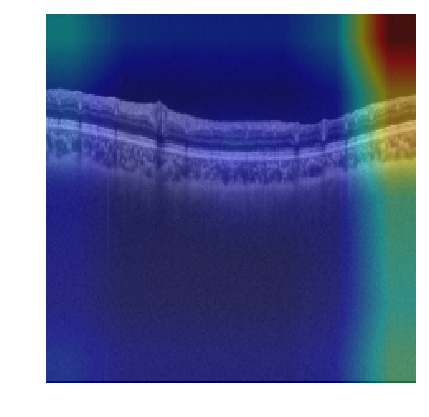

100%|██████████| 512/512 [00:02<00:00, 174.23it/s]


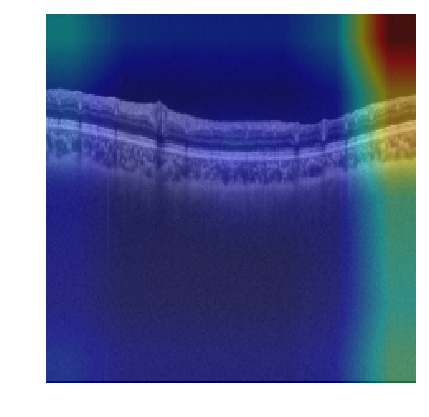

100%|██████████| 512/512 [00:02<00:00, 174.42it/s]


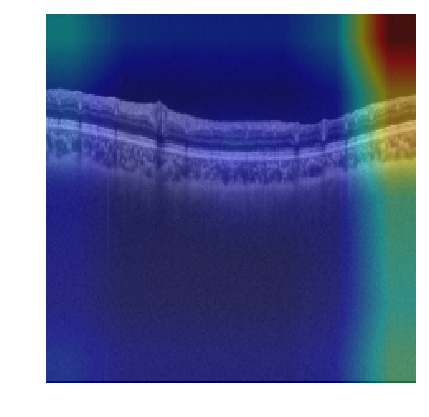

100%|██████████| 512/512 [00:02<00:00, 174.59it/s]


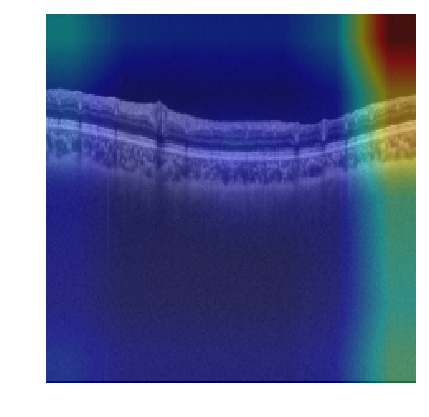

100%|██████████| 512/512 [00:02<00:00, 174.29it/s]


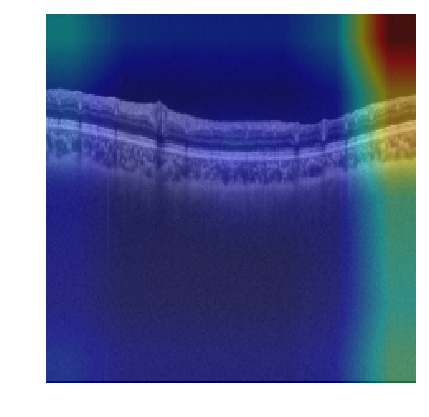

100%|██████████| 512/512 [00:02<00:00, 175.05it/s]


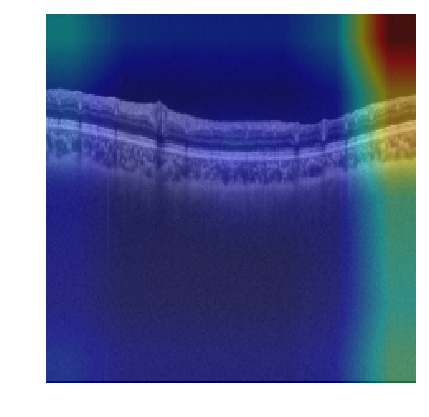

100%|██████████| 512/512 [00:02<00:00, 173.14it/s]


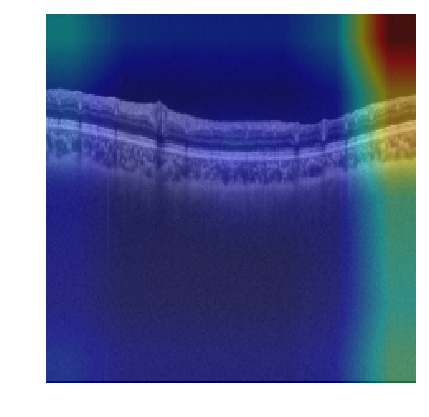

100%|██████████| 512/512 [00:02<00:00, 174.57it/s]


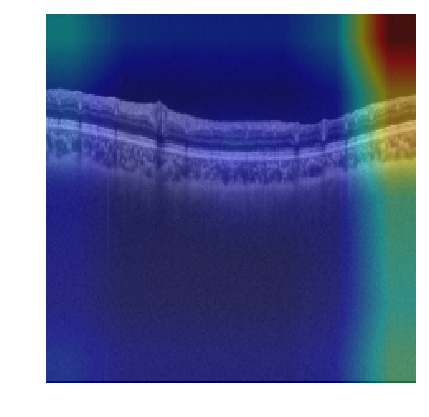

100%|██████████| 512/512 [00:02<00:00, 174.84it/s]


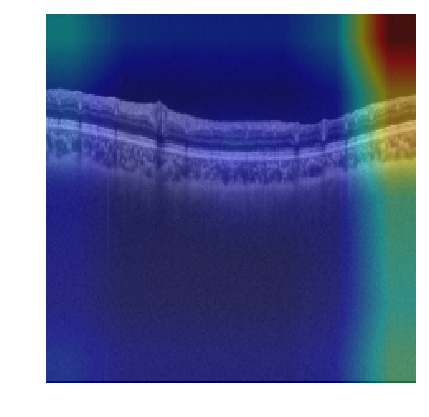

100%|██████████| 512/512 [00:02<00:00, 174.58it/s]


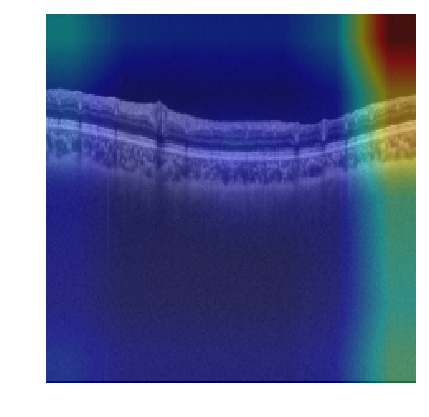

100%|██████████| 512/512 [00:03<00:00, 156.92it/s]


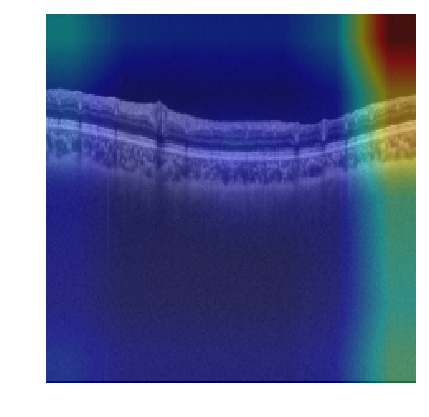

100%|██████████| 512/512 [00:03<00:00, 169.47it/s]


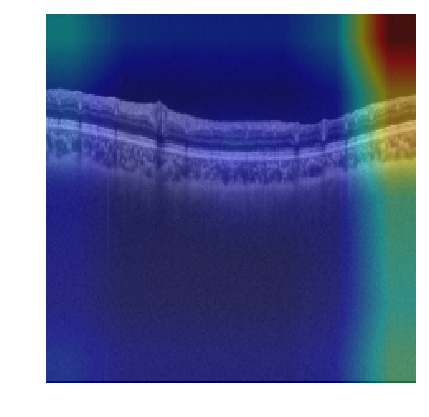

100%|██████████| 512/512 [00:02<00:00, 173.20it/s]


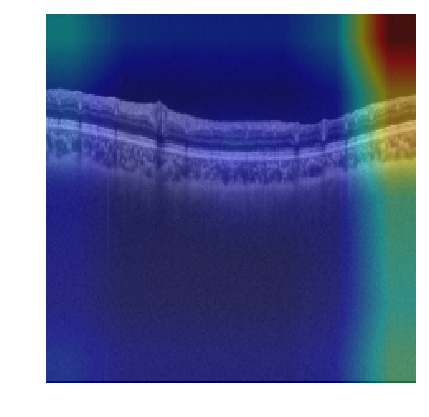

100%|██████████| 512/512 [00:02<00:00, 173.24it/s]


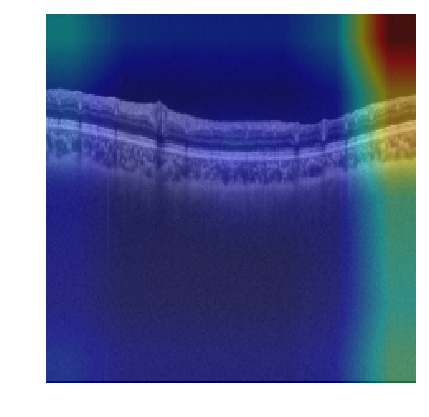

100%|██████████| 512/512 [00:02<00:00, 173.37it/s]


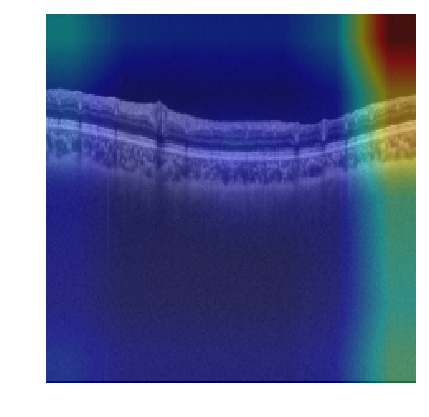

100%|██████████| 512/512 [00:02<00:00, 172.85it/s]


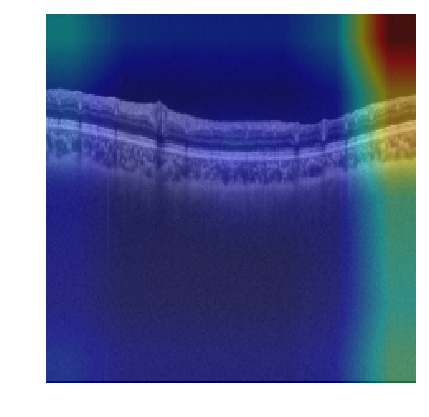

100%|██████████| 512/512 [00:02<00:00, 173.76it/s]


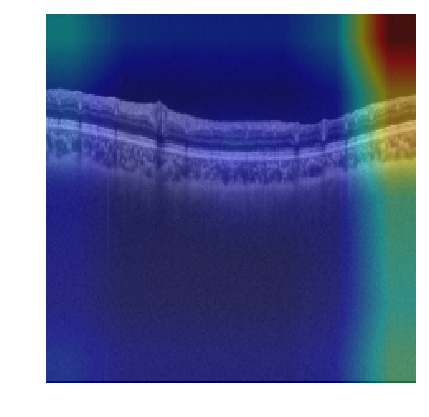

100%|██████████| 512/512 [00:02<00:00, 174.10it/s]


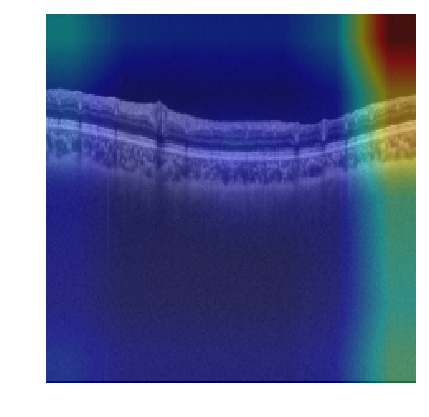

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
import interpretdl as it
import cv2 as cv
img = cv.imread('data/data175394/GOALS2022/Validation/GC_Label_1/0101.png')
img = cv.resize(img, (224, 224))
sg = it.ScoreCAMInterpreter(model.network, use_cuda=True)
for n, v in model.network.named_sublayers():
    try:
        sg.interpret(img, target_layer_name=n)
    except:
        print('Except')